## **DSTEP20 // Open Minneapolis: Police Stops**
<small> January 15, 2020 </small>

**In 2017, did police stops in Minneapolis that involve a person of color also involve a personal search more frequently than do stops involving white people?**

The data can be found [here](http://opendata.minneapolismn.gov/datasets/police-stop-data).

---

### **Loading the data**

As always, our first step is to load the data, and take a quick look at its contents.

In [0]:
# -- imports
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 500)

In [12]:
# -- set the file name
fname = "https://opendata.arcgis.com/datasets/215b4b543d894750aef86c725b56ee2a_0.csv"

# -- load the data
stops = pd.read_csv(fname)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Interesting warning... let's try to follow its recommendations:

In [0]:
# -- re-load the data
stops = pd.read_csv(fname, low_memory=False)

In [14]:
# -- print the dataframe
print(stops)

        OBJECTID masterIncidentNumber              responseDate  \
0           4001            16-436972  2016-12-05T10:17:07.000Z   
1           4002            16-436976  2016-12-05T10:19:15.000Z   
2           4003            16-436992  2016-12-05T10:30:53.000Z   
3           4004            16-437002  2016-12-05T10:47:42.000Z   
4           4005            16-437012  2016-12-05T10:58:38.000Z   
...          ...                  ...                       ...   
146724    146725            20-012269  2020-01-15T03:43:55.000Z   
146725    146726            20-012273  2020-01-15T04:15:20.000Z   
146726    146727            20-012276  2020-01-15T04:18:36.000Z   
146727    146728            20-012280  2020-01-15T04:37:20.000Z   
146728    146729            20-012281  2020-01-15T04:42:44.000Z   

                     reason                      problem      callDisposition  \
0                       NaN  Traffic Law Enforcement (P)           TAG-Tagged   
1                       NaN  Traf

---

### **Data Manipulations Part 1: from slicing to indexing**

What if we wanted stops for the year 2017?  How would we "sub-select" only those rows?

Well, first let's figure out what data type is in the responseDate column,

In [15]:
# -- check data dtype of first element of response date column
print(type(stops["responseDate"].iloc[0]))

<class 'str'>


Looks like it's a string.  So let's start with a string method like we saw last time.  This time let's use the "contains" string method,


In [16]:
# -- print the result of using the "contains" method to see what rows of 
#    response date include contain the string "2017"
print(stops["responseDate"].str.contains("2017"))

0         False
1         False
2         False
3         False
4         False
          ...  
146724    False
146725    False
146726    False
146727    False
146728    False
Name: responseDate, Length: 146729, dtype: bool


The first five and last five rows are all False (note the dtype...), but are there any True in there?  To find out, first note the following:

In [17]:
# -- example boolean NumPy array
barr = np.array([True, True, False, True, False, False, True])

# -- summing it treats the True's as 1's and the False's as 0's
print(barr.sum())


4


So, how would we find out if the output of contains("2017") is True somewhere inside those ...'s ?

In [18]:
# -- check if any response dates contain the string "2017"
n2017 = stops["responseDate"].str.contains("2017").sum()

print("total number of response dates in 2017: {0}".format(n2017))

total number of response dates in 2017: 54156


Already now, we can answer a potentially interesting policy question, **how many stops per year from 2017 to 2019**?

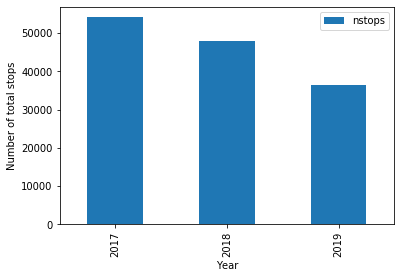

In [20]:
# -- create a new DataFrame containing the number of stops in 2017, 
#    2018, and 2019, and make a bar plot

# -- calculate number of stops for each year
n2017 = stops["responseDate"].str.contains("2017").sum()
n2018 = stops["responseDate"].str.contains("2018").sum()
n2019 = stops["responseDate"].str.contains("2019").sum()

# -- make a list of lists and create a DataFrame
ll_stops = [[2017, n2017], [2018, n2018], [2019, n2019]]
stops_df = pd.DataFrame(ll_stops, columns=["year", "nstops"])

# -- make a bar plot
ax   = stops_df.plot.bar("year", "nstops")
xlab = ax.set_xlabel("Year")
ylab = ax.set_ylabel("Number of total stops")

How would you interpret this plot?

Now, let's finish sub-selecting only 2017 stops for further analysis.  Notice the following:

In [21]:
# -- create a number array with some values that is the SAME LENGTH as the 
#    boolean array (barr) created above
myarr = np.array([62.3, -23, 63, 94, 1, -22.5, 0.88])

# -- print ONLY values where barr is True
print(myarr)
print(barr)
print(myarr[barr])

[ 62.3  -23.    63.    94.     1.   -22.5    0.88]
[ True  True False  True False False  True]
[ 62.3  -23.    94.     0.88]


This is type of operation is called "indexing" and is an extension of the "slicing" concept we've seen before:

In [22]:
# -- slicing:
print(myarr[2:5])

# -- indexing
ind = np.array([False, False, True, True, True, False, False])
print(myarr[ind])

[63. 94.  1.]
[63. 94.  1.]


But notice that the output of our .str.contains("2017") method call was exactly a True/False (boolean) array!  So now we can finally subset our Minneapolis stops data to only 2017:

In [23]:
# -- create a True/False index of when response date contains 2017
ind = stops["responseDate"].str.contains("2017")

# -- sub-select only those rows
stops17 = stops[ind]

# -- print the result
print(stops17)

       OBJECTID masterIncidentNumber              responseDate  \
1000      10001            17-029747  2017-01-25T22:24:52.000Z   
1001      10002            17-029769  2017-01-25T22:45:20.000Z   
1002      10003            17-029776  2017-01-25T22:50:14.000Z   
1003      10004            17-029779  2017-01-25T22:54:24.000Z   
1004      10005            17-029787  2017-01-25T22:59:30.000Z   
...         ...                  ...                       ...   
94595     95596            17-473484  2017-12-15T06:49:27.000Z   
94596     95597            17-479333  2017-12-20T11:37:20.000Z   
94597     95598            17-487421  2017-12-28T07:57:56.000Z   
94598     95599            17-488696  2017-12-29T07:52:07.000Z   
94599     95600            17-488702  2017-12-29T07:58:43.000Z   

                 reason                      problem       callDisposition  \
1000                NaN        Suspicious Person (P)  UTL-Unable to Locate   
1001                NaN  Traffic Law Enforcement (P

There is one last bit of indexing that we'll need to subset this data into a form that we want: "relational indexing".

Again, notice the following,

In [24]:
# -- create a number array with some values
myarr = np.array([62.3, -23, 63, 94, 1, -22.5, 0.88])

# -- print ONLY values that are negative
ind = myarr < 0.0
print(ind)
print(myarr[ind])

[False  True False False False  True False]
[-23.  -22.5]


In [25]:
# -- here are some examples of these types of logical relations
print("1. {0}".format(myarr >= 1))
print("2. {0}".format(myarr == 0.88))
print("3. {0}".format(myarr != 63))

1. [ True False  True  True  True False False]
2. [False False False False False False  True]
3. [ True  True False  True  True  True  True]


With this, we have the tools to answer the question: **<i>"in 2017, what fraction of stops involved a person of color?"</i>**, right?

In [29]:
# -- create True/False arrays for White and not White
ind_wht = stops17["race"] == "White"
ind_poc = stops17["race"] != "White"

nstops17 = len(stops17)
nwht17 = len(stops17[ind_wht])
npoc17 = len(stops17[ind_poc])

print("fraction of subjects that are white     : {0:4.3}".format(nwht17 / nstops17))
print("fraction of subjects that are not white : {0:4.3}".format(npoc17 / nstops17))

fraction of subjects that are white     : 0.222
fraction of subjects that are not white : 0.778


**Not so fast...**, we still have to deal with NaN's, type of stop, etc.

---

### **Data Manipulations Part 2: removing NaNs and groupings**

What to do about NaNs is a complex consideration without a universal answer.  Different situations and different contexts require different handling of NaN values.

#### **<i>Regardless of what you do with NaNs, the <u>most</u> important thing is to acknowledge your choice and describe its consequences when presenting results.</i>**

For now, let's drop NaNs using the 2017 DataFrame's .dropna method,

In [30]:
# -- drop NaNs
print( stops17.dropna())

       OBJECTID masterIncidentNumber              responseDate  \
35000     38001            17-264706  2017-07-15T00:44:06.000Z   
35001     38002            17-264708  2017-07-15T00:45:15.000Z   
35002     38003            17-264713  2017-07-15T00:48:26.000Z   
35003     38004            17-264718  2017-07-15T00:51:51.000Z   
35004     38005            17-264734  2017-07-15T01:05:55.000Z   
...         ...                  ...                       ...   
94593     95594            17-469769  2017-12-12T06:31:50.000Z   
94594     95595            17-472268  2017-12-14T07:42:24.000Z   
94595     95596            17-473484  2017-12-15T06:49:27.000Z   
94597     95598            17-487421  2017-12-28T07:57:56.000Z   
94599     95600            17-488702  2017-12-29T07:58:43.000Z   

                    reason                      problem      callDisposition  \
35000      Citizen / 9-1-1       Suspicious Vehicle (P)      INF-Information   
35001        Investigative       Suspicious Veh

How many rows did we lose?

In [31]:
# -- check how many rows were dropped
print(len(stops17.dropna()) / len(stops17))

0.3632653814905089


That's a lot of lost data!  Perhaps we are being a bit restrictive.  For example, for the question we're trying to answer (BUT NOT OTHER QUESTIONS!), the preRace value may be fine taking on a NaN value.  Let's check which columns have the most NaN's using the .isna method and summing across the 0'th axis:

In [32]:
# -- print out how many NaNs per column
print(stops17.isna().sum(axis=0))

OBJECTID                    0
masterIncidentNumber        0
responseDate                0
reason                  19316
problem                     0
callDisposition          1163
citationIssued          34292
personSearch             8854
vehicleSearch            8854
preRace                  8854
race                     8854
gender                   8854
lat                         0
long                        0
x                           0
y                           0
policePrecinct            683
neighborhood              683
lastUpdateDate              0
dtype: int64


Since we're mostly interested in the race and personSearch columns, perhaps we can drop only rows that have NaNs in those columns:

In [33]:
# -- drop NaNs from race and personSearch columns and send to a new DataFrame
indr = ~stops17["race"].isna() # race column is not NaN
indp = ~stops17["personSearch"].isna() # personSearch column is not NaN

ind_tot = indr & indp # combine indices (meaning both must be True)
sub17 = stops17[ind_tot]

print(indr)
print(indp)
print(ind_tot)
print(sub17)

1000      True
1001      True
1002      True
1003      True
1004      True
         ...  
94595     True
94596    False
94597     True
94598    False
94599     True
Name: race, Length: 54156, dtype: bool
1000      True
1001      True
1002      True
1003      True
1004      True
         ...  
94595     True
94596    False
94597     True
94598    False
94599     True
Name: personSearch, Length: 54156, dtype: bool
1000      True
1001      True
1002      True
1003      True
1004      True
         ...  
94595     True
94596    False
94597     True
94598    False
94599     True
Length: 54156, dtype: bool
       OBJECTID masterIncidentNumber              responseDate  \
1000      10001            17-029747  2017-01-25T22:24:52.000Z   
1001      10002            17-029769  2017-01-25T22:45:20.000Z   
1002      10003            17-029776  2017-01-25T22:50:14.000Z   
1003      10004            17-029779  2017-01-25T22:54:24.000Z   
1004      10005            17-029787  2017-01-25T22:59:30.000Z

In [34]:
# -- check the results
print(sub17.isna().sum(axis=0))

print("")

# -- check how many rows were dropped
print(len(sub17) / len(stops17))

OBJECTID                    0
masterIncidentNumber        0
responseDate                0
reason                  10462
problem                     0
callDisposition             0
citationIssued          25438
personSearch                0
vehicleSearch               0
preRace                     0
race                        0
gender                      0
lat                         0
long                        0
x                           0
y                           0
policePrecinct            508
neighborhood              508
lastUpdateDate              0
dtype: int64

0.8365093433783883


And so we've only had to discard about 16.5% of our data for this question.

Now let's find the total number of stops for each race using the powerful .groupby method,

In [35]:
# -- groupy by race and count stops
print(sub17.groupby("race").count())

                 OBJECTID  masterIncidentNumber  responseDate  reason  \
race                                                                    
Asian                 673                   673           673     497   
Black               15790                 15790         15790   12095   
East African         2225                  2225          2225    1665   
Latino               1909                  1909          1909    1455   
Native American      1604                  1604          1604    1265   
Other                1422                  1422          1422    1046   
Unknown              9645                  9645          9645    7794   
White               12034                 12034         12034    9023   

                 problem  callDisposition  citationIssued  personSearch  \
race                                                                      
Asian                673              673             260           673   
Black              15790            15790   

There is much to say about groupby objects:

- index is now the values
- need to have .groupby followed by summary function (count, sum, first, mean, etc.)
- can pop index back into output with .reset_index method

We can use this grouped DataFrame to get the total number of stops for each race

In [0]:
# -- make counts by race DataFrame
cbr17 = sub17.groupby("race").count()

In [37]:
# -- get the index
rind = cbr17.index

print(rind)

Index(['Asian', 'Black', 'East African', 'Latino', 'Native American', 'Other',
       'Unknown', 'White'],
      dtype='object', name='race')


In [0]:
# -- get the total number of stopped white persons (nb, we know that OBJECTID 
#    has no NaN values)
nstop_wht = cbr17["OBJECTID"].loc["White"]

In [39]:
# -- get the total non-white stops (NOTE: IT'S IMPORTANT THAT WE HAVE EXCLUDED 
#    THE "UNKNOWN" CATEGORY)
print(cbr17["OBJECTID"].loc[rind[:6]])

nstop_poc = cbr17["OBJECTID"].loc[rind[:6]].sum()

race
Asian                673
Black              15790
East African        2225
Latino              1909
Native American     1604
Other               1422
Name: OBJECTID, dtype: int64


In [40]:
# -- print out the results
print("total number of stops with white subject : {0}".format(nstop_wht))
print("total number of stops with poc subject   : {0}".format(nstop_poc))

total number of stops with white subject : 12034
total number of stops with poc subject   : 23623


---

### **Putting it all together**

We now have the total number of stops for white subjects and subjects of color.  What remains to get the total number of searches for white subjects and people of color.  We can combine indexing and grouping to do this:

In [41]:
# -- create a new data frame with only YES for personSearched
print("personSearch values: {0}".format(np.unique(sub17["personSearch"])))

searched17 = sub17[sub17["personSearch"] == "YES"]

print(searched17)

personSearch values: ['NO' 'YES']
       OBJECTID masterIncidentNumber              responseDate  \
1008      10009            17-029800  2017-01-25T23:08:50.000Z   
1016      10017            17-029861  2017-01-26T00:04:34.000Z   
1018      10019            17-029877  2017-01-26T00:33:27.000Z   
1020      10021            17-029892  2017-01-26T01:02:57.000Z   
1047      10048            17-030205  2017-01-26T11:24:36.000Z   
...         ...                  ...                       ...   
94560     95561            17-411316  2017-10-25T07:42:46.000Z   
94575     95576            17-437921  2017-11-15T07:29:24.000Z   
94578     95579            17-439175  2017-11-16T06:29:54.000Z   
94586     95587            17-452847  2017-11-28T07:53:05.000Z   
94589     95590            17-454423  2017-11-29T08:55:31.000Z   

                reason                      problem callDisposition  \
1008               NaN       Suspicious Vehicle (P)      TAG-Tagged   
1016               NaN       Su

In [0]:
# -- we can group and count exactly as we did with the full DataFrame to count 
#    the total number of searched persons by race.

# -- make searched counts by race DataFrame
sbr17 = searched17.groupby("race").count()

# -- get the total number of stopped white persons (nb, we know that OBJECTID 
#    has no NaN values)
nsearch_wht = sbr17["OBJECTID"].loc["White"]

# -- get the total non-white stops (NOTE: IT'S IMPORTANT THAT WE HAVE EXCLUDED 
#    THE "UNKNOWN" CATEGORY)
nsearch_poc = sbr17["OBJECTID"].loc[rind[:6]].sum()

**And so finally, we can divide to get the ratio:**

In [44]:
print("fraction of stopped white persons that are searched    : {0:4.3}".format(nsearch_wht / nstop_wht))
print("fraction of stopped persons of color that are searched : {0:4.3}".format(nsearch_poc / nstop_poc))

fraction of stopped white persons that are searched    : 0.0854
fraction of stopped persons of color that are searched : 0.189


How do we interpret these results?  What caveats are there?

FWIW, we can also divide one DataFrame by another (element-wise):

In [45]:
sbr17 / cbr17

,OBJECTID,masterIncidentNumber,responseDate,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,gender,lat,long,x,y,policePrecinct,neighborhood,lastUpdateDate
race,,,,,,,,,,,,,,,,,,
Asian,0.101040,0.101040,0.101040,0.104628,0.101040,0.101040,0.088462,0.101040,0.101040,0.101040,0.101040,0.101040,0.101040,0.101040,0.101040,0.103030,0.103030,0.101040
Black,0.208360,0.208360,0.208360,0.215130,0.208360,0.208360,0.222973,0.208360,0.208360,0.208360,0.208360,0.208360,0.208360,0.208360,0.208360,0.209607,0.209607,0.208360
East African,0.078202,0.078202,0.078202,0.087087,0.078202,0.078202,0.100473,0.078202,0.078202,0.078202,0.078202,0.078202,0.078202,0.078202,0.078202,0.078912,0.078912,0.078202
Latino,0.121006,0.121006,0.121006,0.125086,0.121006,0.121006,0.128342,0.121006,0.121006,0.121006,0.121006,0.121006,0.121006,0.121006,0.121006,0.122158,0.122158,0.121006
Native American,0.313591,0.313591,0.313591,0.309881,0.313591,0.313591,0.303935,0.313591,0.313591,0.313591,0.313591,0.313591,0.313591,0.313591,0.313591,0.315224,0.315224,0.313591
Other,0.135021,0.135021,0.135021,0.143403,0.135021,0.135021,0.151920,0.135021,0.135021,0.135021,0.135021,0.135021,0.135021,0.135021,0.135021,0.136006,0.136006,0.135021
Unknown,0.010886,0.010886,0.010886,0.011419,0.010886,0.010886,0.011934,0.010886,0.010886,0.010886,0.010886,0.010886,0.010886,0.010886,0.010886,0.010986,0.010986,0.010886
White,0.085425,0.085425,0.085425,0.087887,0.085425,0.085425,0.088308,0.085425,0.085425,0.085425,0.085425,0.085425,0.085425,0.085425,0.085425,0.086128,0.086128,0.085425


In [46]:
cbr17

,OBJECTID,masterIncidentNumber,responseDate,reason,problem,callDisposition,citationIssued,personSearch,vehicleSearch,preRace,gender,lat,long,x,y,policePrecinct,neighborhood,lastUpdateDate
race,,,,,,,,,,,,,,,,,,
Asian,673,673,673,497,673,673,260,673,673,673,673,673,673,673,673,660,660,673
Black,15790,15790,15790,12095,15790,15790,6956,15790,15790,15790,15790,15790,15790,15790,15790,15634,15634,15790
East African,2225,2225,2225,1665,2225,2225,846,2225,2225,2225,2225,2225,2225,2225,2225,2205,2205,2225
Latino,1909,1909,1909,1455,1909,1909,748,1909,1909,1909,1909,1909,1909,1909,1909,1891,1891,1909
Native American,1604,1604,1604,1265,1604,1604,737,1604,1604,1604,1604,1604,1604,1604,1604,1583,1583,1604
Other,1422,1422,1422,1046,1422,1422,599,1422,1422,1422,1422,1422,1422,1422,1422,1397,1397,1422
Unknown,9645,9645,9645,7794,9645,9645,4860,9645,9645,9645,9645,9645,9645,9645,9645,9558,9558,9645
White,12034,12034,12034,9023,12034,12034,4858,12034,12034,12034,12034,12034,12034,12034,12034,11866,11866,12034
